In [29]:
import seaborn as sns
import random
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import scipy.stats

In [2]:
threshold = 0.1

In [3]:
count = 0
valid = []
to_plot = []
for i in range(0,100000) : 
    couple = np.random.normal(0,1,2)
    to_plot.append(couple)
    if np.absolute(couple[0]*couple[1]) <= threshold :
        count += 1
        valid.append(couple)

In [4]:
data_ok = pd.DataFrame(valid)
data_to_plot = pd.DataFrame(to_plot)

/tmp/ipykernel_296/3318628882.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(data_to_plot[0], data_to_plot[1], 'bo', color = 'blue', marker='.', markersize=5)
/tmp/ipykernel_296/3318628882.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data_to_plot[0], data_to_plot[1], 'bo', color = 'blue', marker='.', markersize=5)
/tmp/ipykernel_296/3318628882.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(data_ok[0], data_ok[1],'bo', color = 'red',  marker='.', markersize=5)
/tmp/ipykernel_296/3318628882.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'

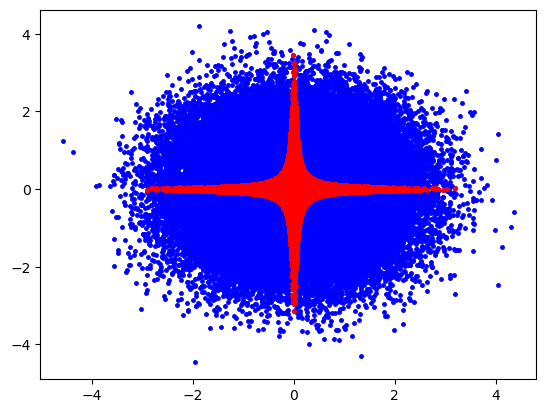

In [5]:
plt.plot(data_to_plot[0], data_to_plot[1], 'bo', color = 'blue', marker='.', markersize=5)
plt.plot(data_ok[0], data_ok[1],'bo', color = 'red',  marker='.', markersize=5)

### Importance sampling

In [15]:
def emp_mean(sample) :
    sum = 0
    for i in sample :
        sum += i
    mean = sum/len(sample)
    return mean        

In [17]:
mu = emp_mean(valid)

In [20]:
sigma = np.cov(valid, rowvar = False)

In [23]:
proposition = np.random.multivariate_normal(mu, sigma, 1000)

In [27]:
lambda x: np.random.multivariate_normal(mu, sigma).pdf(x)

<function __main__.<lambda>(x)>

In [55]:
def pi(x) :
    if abs(x) <= threshold :
        pdf = np.random.multivariate_normal((0,0), np.identity(2)).pdf(x)/(len(valid)/len(to_plot))
    else :
        pdf = 0
    return pdf

In [56]:
pi(0.01)

AttributeError: 'numpy.ndarray' object has no attribute 'pdf'

In [38]:
np.random.normal(0,1).pdf(x)/(len(valid)/len(to_plot))

AttributeError: 'float' object has no attribute 'pdf'

In [39]:
lambda x: np.random.normal(0,1).pdf(x)/(len(valid)/len(to_plot))

<function __main__.<lambda>(x)>

In [42]:
for i in [0.1, 0.2, 0.3, 0.4] :
    test = []
    test.append(lambda x: np.random.normal(0,1).pdf(x)/(len(valid)/len(to_plot))(i))

In [43]:
test

[<function __main__.<lambda>(x)>]

In [57]:
(lambda x: np.random.normal(0,1).pdf(x)/(len(valid)/len(to_plot)))(0.1)

AttributeError: 'float' object has no attribute 'pdf'